In [4]:
%matplotlib inline

In [5]:
import csv
import re

import random

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [6]:
g = nx.Graph() # Build the graph

In [7]:
def clean_artist(raw_artist):
    # Remove anything in parentheses with 'feat'
    raw_artist = re.sub(r'\(.*?feat.*?\)', '', raw_artist, flags=re.IGNORECASE)
    raw_artist = re.sub(r'feat\..*', '', raw_artist, flags=re.IGNORECASE)
    
    # Only keep the first artist (split on comma), strip whitespace, and lowercase
    return raw_artist.split(',')[0].strip().lower()

def clean_genre(raw_genre):
    return raw_genre.strip().lower()

# Read the CSV file and process data
with open("spotify_tracks.csv", "r", encoding="utf-8") as in_file:
    musicbox = []
    reader = csv.DictReader(in_file)

    for row in reader:
        if not row.get('artists') or not row.get('genre'):
            continue  # Skip rows with missing artist or genre

        # Clean artist and genre fields
        singer_name = clean_artist(row['artists'])
        genre = clean_genre(row['genre'])

        # Add cleaned row to list
        musicbox.append({
            'artist': singer_name,
            'genre': genre
        })

        # Add node to graph
        g.add_node(singer_name)

# Generate connections between artists with the same genre
connections = set()
for i in range(len(musicbox)):
    for j in range(i + 1, len(musicbox)):
        if musicbox[i]['genre'] == musicbox[j]['genre']:
            left_singer = musicbox[i]['artist']
            right_singer = musicbox[j]['artist']
            if left_singer != right_singer:
                connections.add(tuple(sorted((left_singer, right_singer))))
                
for left_singer, right_singer in list(connections)[:10]:
    g.add_edge(left_singer, right_singer)




In [8]:
degree_centrality = nx.degree_centrality(g)
print(degree_centrality)


{'billy raffoul': 0.0, 'molly hocking': 0.0, 'the goo goo dolls': 0.0, 'guus dielissen': 0.0, 'ling tosite sigure': 0.0, 'benson boone': 0.0, 'sonido de agua en bambu': 0.0, 'healing solfeggio frequencies': 0.0, 'roses & frey': 0.0, 'the re-stoned': 0.0, 'sam smith': 0.0, 'the moon loungers': 0.0, 'lesfm': 0.0, 'slander': 0.0, 'cody fry': 0.0, 'mortal treason': 0.0, 'frank ocean': 0.0, 'girl in the distance': 0.0, 'simon & garfunkel': 0.0, 'jonah baker': 0.0, 'puppe music': 0.0, 'syml': 0.0, 'acoustic levitation': 0.0, 'trainman': 0.0, 'hillside recording': 0.0, 'acoustics': 0.0, 'kondor': 0.0, 'jason derulo': 0.0, 'acoustic quarter': 0.0, 'helios jazz club': 0.0, 'ajr': 0.0, 'devin the dude': 0.0, 'ben weighill': 0.0, 'david ai': 0.0, 'sza': 0.0, 'jay filson': 0.0, 'u know & the drill': 0.0, 'matt johnson': 0.0, 'xtravert': 0.0, 'bailey zimmerman': 0.0, 'thomas daniel': 0.0, 'mark s.d.ray': 0.0, 'noah kahan': 0.0, 'acoustic guitar collective': 0.0, 'dj funkybee': 0.0, 'lofi afrobeats'

In [9]:
eigenvector_centrality = nx.eigenvector_centrality(g)
print(list(eigenvector_centrality.items())[:10])

[('billy raffoul', 8.529922386207482e-07), ('molly hocking', 8.529922386207482e-07), ('the goo goo dolls', 8.529922386207482e-07), ('guus dielissen', 8.529922386207482e-07), ('ling tosite sigure', 8.529922386207482e-07), ('benson boone', 8.529922386207482e-07), ('sonido de agua en bambu', 8.529922386207482e-07), ('healing solfeggio frequencies', 8.529922386207482e-07), ('roses & frey', 8.529922386207482e-07), ('the re-stoned', 8.529922386207482e-07)]


In [10]:
closeness_centrality = nx.closeness_centrality(g)

In [11]:
top_k = 20  # How many of the most central nodes to print
for u in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:top_k]:
    print(u, degree_centrality[u])  # u = Singer Name, degree_centrality[u] = Centrality

np project 0.00023207240659085636
sonique 0.00023207240659085636
bodo wartke 0.00023207240659085636
prod by chocolate 0.00023207240659085636
dj.stress (m.c.p) 0.00023207240659085636
macan band 0.00023207240659085636
thirumali 0.00023207240659085636
2pm 0.00023207240659085636
onlyjstn 0.00023207240659085636
minimal durch 0.00023207240659085636
elkino 0.00023207240659085636
hussain ali 0.00023207240659085636
dexter and the moonrocks 0.00023207240659085636
airtor beats 0.00023207240659085636
marihanna 0.00023207240659085636
antônio brother 0.00023207240659085636
will sparks 0.00023207240659085636
destructo 0.00023207240659085636
sanguisugabogg 0.00023207240659085636
anıl emre daldal 0.00023207240659085636


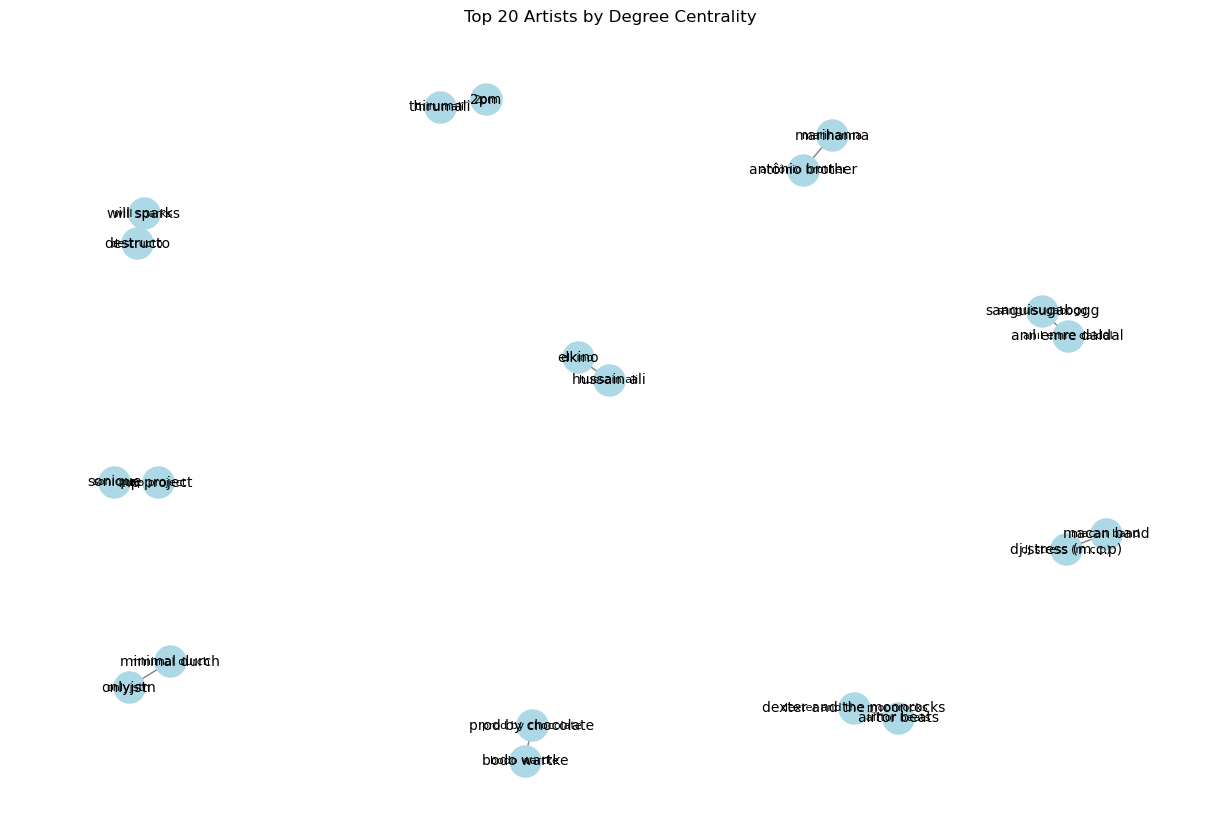

In [12]:
#Degree Centrality

# Get top artists based on degree centrality
top_artists = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(12, 8))

# Use spring layout for better visualization
pos = nx.spring_layout(top_g)  

nx.draw(top_g, pos, with_labels=True, node_size=500, font_size=8, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=10)

plt.title("Top 20 Artists by Degree Centrality")
plt.show()


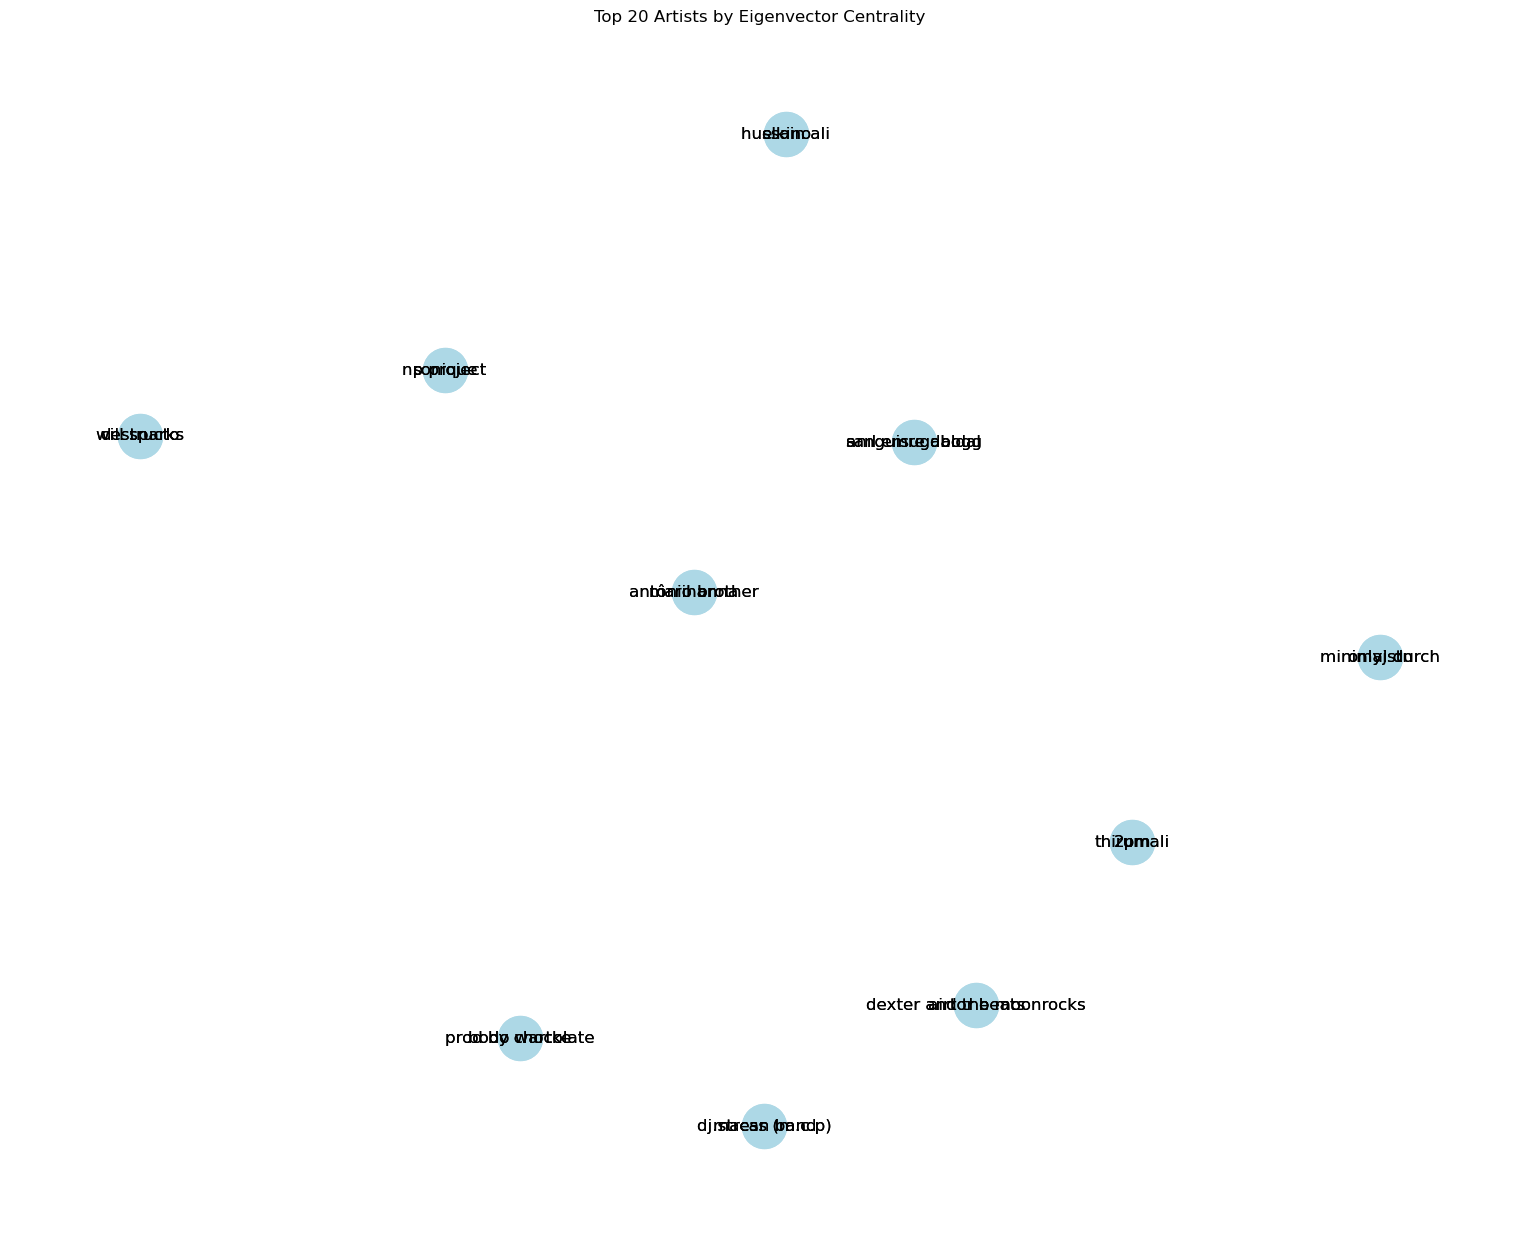

In [13]:
#Eigenvector Centrality
# Assuming eigenvector_centrality is already computed and top_k is set
top_artists = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(15, 12))  # Larger figure size

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(top_g, weight=None)  # Use this for better node separation

# Draw the graph with better spacing
nx.draw(top_g, pos, with_labels=True, node_size=1000, font_size=12, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=12)

plt.title("Top 20 Artists by Eigenvector Centrality")
plt.show()

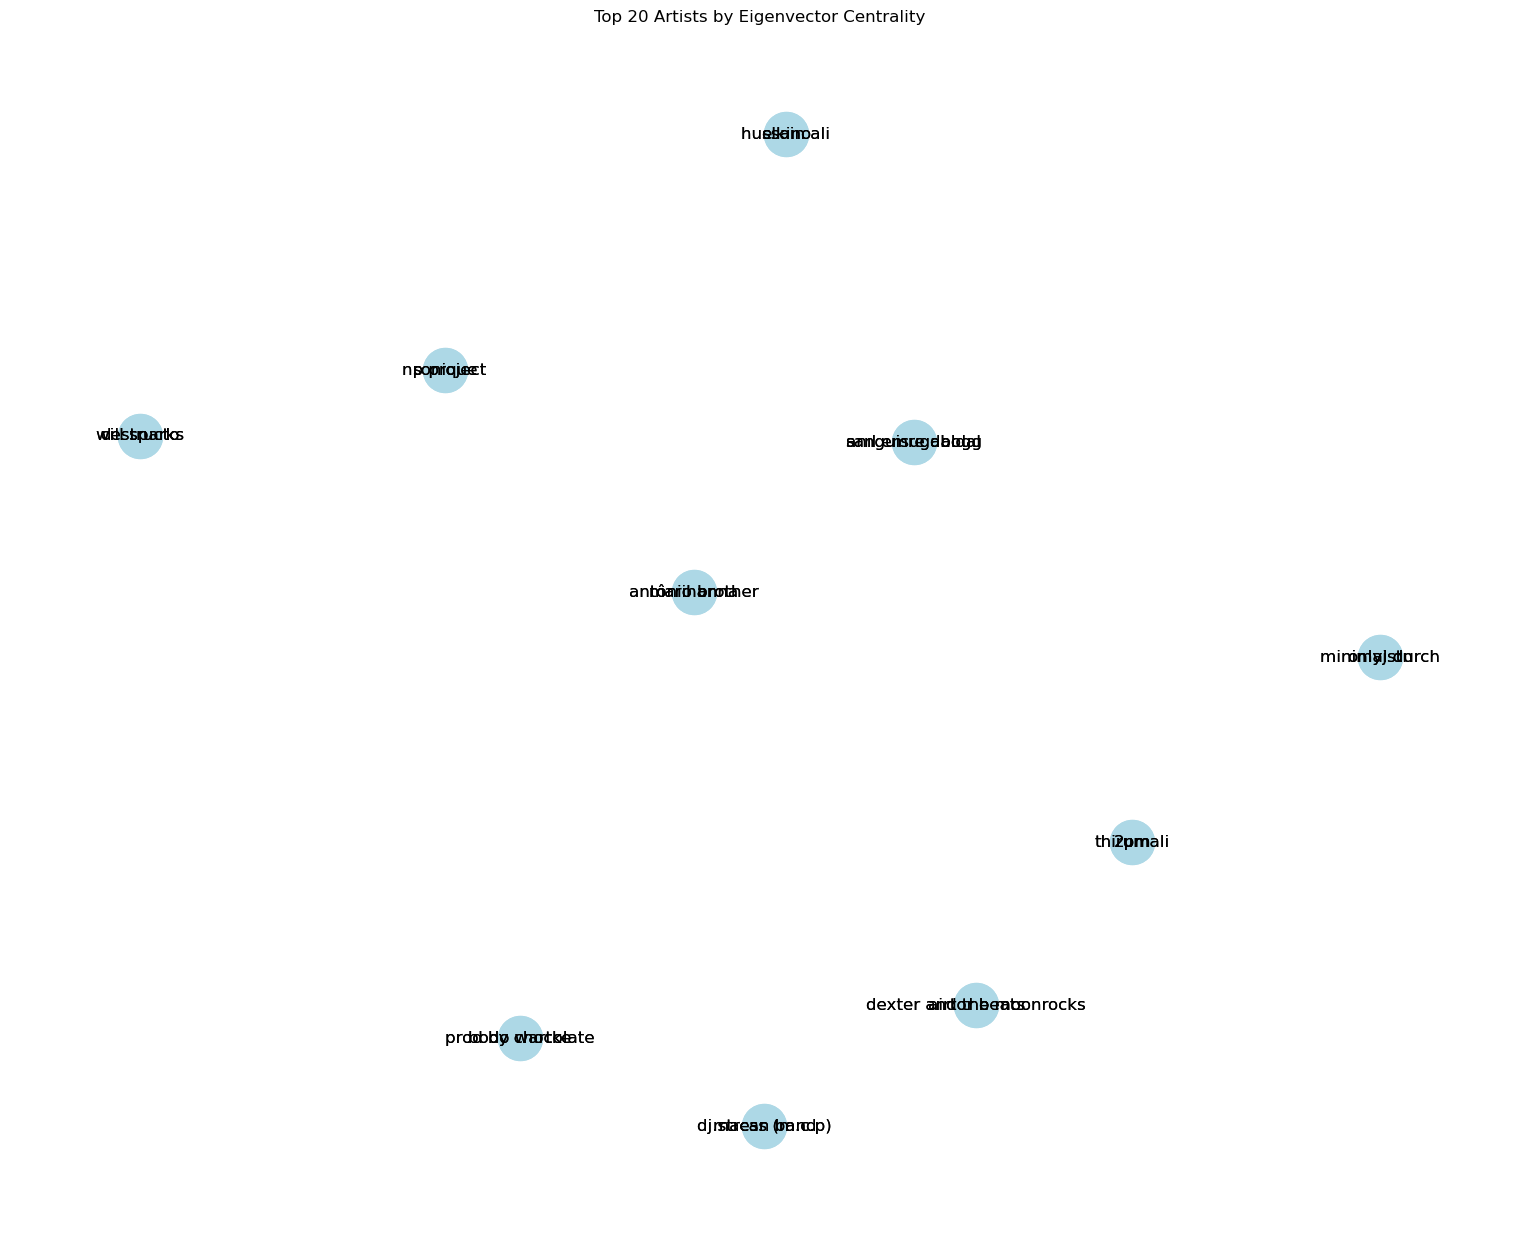

In [14]:
#Closeness Centrality
# Assuming eicloseness_centrality genvector_centrality is already computed and top_k is set
top_artists = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(15, 12))  # Larger figure size

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(top_g, weight=None)  # Use this for better node separation

# Draw the graph with better spacing
nx.draw(top_g, pos, with_labels=True, node_size=1000, font_size=12, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=12)

plt.title("Top 20 Artists by Eigenvector Centrality")
plt.show()